### We create a class : Perceptron 

Perceptron methods: 

    +Initialization with Learning Rate and number of Epochs

    +Fitting: fit the model over a dataframe for N Epochs. We also create a list with number of  
              mislcassfication per epochs

    +Calculating the dot product Wt*X

    +Prediction on the previous dot product

In [8]:
import numpy as np #to work with (multidimensional) array

class Perceptron(object): #the object class is "the base" class. I can write also class Perceptron(): or class Perceptron:
    """ Perceptron classifier.
    
    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset. Number of epochs
    
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
    """
    
    def __init__(self, eta = 0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self,X,y):
        """Fit training data
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and 
            n_features is the number of features.
        y : array-like, shape = [n_samples, 1]
            Target values.
            
        Returns
        --------
        
        self : object
        """
        
        self.w_ = np.zeros(1 + X.shape[1])  #1d-array of shape [n_features+1, 1]. X.shape[1] takes the number of features
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi , target in zip(X,y):
                update = self.eta*(target-self.predict(xi))
                self.w_[1:] += update* xi
                self.w_[0] += update
                errors += int(update != 0.0) # int(true) = 1 --> we add one for each line xi that predicts wrong
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):  #I calculate the product Wt*xi BEFORE activation function
        """Calculate net input"""   #IMPORTANT!!!: X is a vector NOT a Matrix!!!
        return np.dot(X, self.w_[1:]) + self.w_[0] #shape--> [1,n_features]*[n_features,1] = [1,1] -->scalar!!!

    def predict(self,X):
        """Return class label after unit step"""   #unit step is defined in the previous method
        return np.where(self.net_input(X) >= 0, 1,-1)
    
    
        
        
        
        
        
        

### Perceptron class on IRIS dataset:

First of all we import our dataset directly from Web repository (UCI ML DEPOSITORY)

In [4]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)

df.tail() #we print last rows of Iris dataset


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


We plot the first 100 rows of sepal lenght and petal lenght:

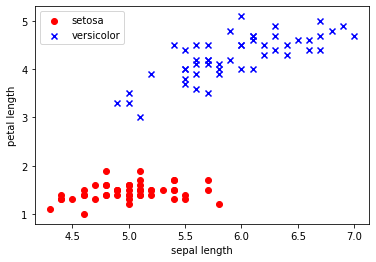

In [5]:
import matplotlib.pyplot as plt

import numpy as np

y = df.iloc[0:100, 4].values  #an array that takes the first 100 rows and the responce (5th column)

y = np.where(y == "Iris-setosa",-1,1)

X = df.iloc[0:100, [0,2]].values #We extract the first 100 rows for the first and third column

plt.scatter(X[:50, 0], X[:50,1], color = "red" , marker = "o", label ="setosa")

plt.scatter(X[50:100, 0], X[50:100,1], color = "blue" , marker = "x", label ="versicolor")

plt.xlabel("sepal length")

plt.ylabel("petal length")

plt.legend(loc="upper left")

plt.show()

#Perceptron algo converges if two classes are linarly separable (like graph below) and the learning rate is (sufficiently) small. 


Train the perceptron algorithm on the IRIS dataset

Plot the number of misclassification for Epochs

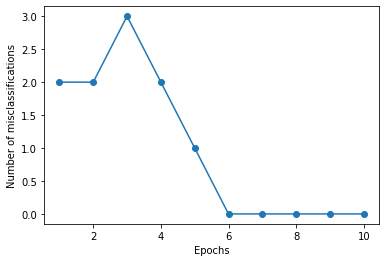

In [9]:
ppn = Perceptron(eta= 0.1, n_iter=10)

ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_,marker ="o")

plt.xlabel("Epochs")

plt.ylabel("Number of misclassifications")

plt.show()

In [ ]:
print(ppn.errors_)

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


The algorithm converge!!!--> We have always the same number of misclassification over the epochs (zero) --> minimum value on our funtion cost 

Visualizing the Decision Boundaries:

In [1]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution = 0.02):
    
    # setup marker generator and color map
    
    markers =("s","x","o","^","v")
    
    colors =("red","blue","lightgreen","gray","cyan")
    
    cmap = ListedColormap(colors[:len(np.unique(y))])  #np.unique(y) = array([-1,1]) with y = array([-1,1,1....n]), n=100
    #Important: we can use directly colors inside plot.contour --> plt.contour(xx1,xx2,Z,alpha=0.4,colors = colors) 
    #plot the decision surface
    
    X1_min, X1_max = X[:, 0].min() -1, X[:,0].max() +1
    
    X2_min, X2_max = X[:,1].min() -1, X[:,1].max() +1
    
    xx1 ,xx2 = np.meshgrid(np.arange(X1_min,X1_max,resolution), np.arange(X2_min,X2_max,resolution)) #Meshgrid returns two matrixes with with x and y coordinates. Np.arange like range() but return an array
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    
    plt.xlim(xx1.min(), xx2.max())
    
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label =cl)
        
    
    
    
    

We use our plot_decision_regions() function:

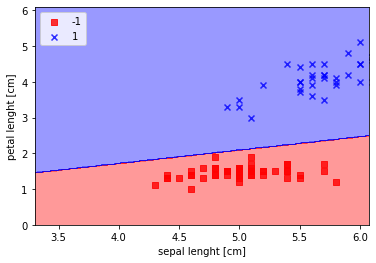

In [10]:
plot_decision_regions(X,y,classifier= ppn)

plt.xlabel("sepal lenght [cm]")
plt.ylabel("petal lenght [cm]")
plt.legend(loc = "upper left")
plt.show()

An example with some operations: (meshgrid, ravel,np.array, tranpose and reshape)

In [9]:
import numpy as np

nx, ny = (3, 2)

print("nx:",nx)
print("ny",ny)
print("-------")

x1 = np.linspace(0, 3, 6)

x2 = np.linspace(0, 3, 6)

xv, yv = np.meshgrid(x1, x2) #Two matrixes are generated. Shape of each matrix: (6,6)

print("x1:",x1)
print("x2:",x2)
print("-------")
print("xv:",xv)
print("yv:",yv)
print("-------")
print("xv.ravel:",xv.ravel())  #shape (36,)
print("yv.ravel:",yv.ravel())
print("-------")
print("np.array([xv.ravel,yv.ravel])",np.array([xv.ravel(),yv.ravel()]))
print("-------")
print("np.array([xv.ravel,yv.ravel].Transpose)",np.array([xv.ravel(),yv.ravel()]).T)
futureValue = ppn.predict(np.array([xv.ravel(),yv.ravel()]).T)
print("-------")
print("classifier.predict(previous array)",futureValue)
futureValueReshape = futureValue.reshape(xv.shape)
print("-------")
print("PredictValueReshape",futureValueReshape)



nx: 3
ny 2
-------
x1: [0.  0.6 1.2 1.8 2.4 3. ]
x2: [0.  0.6 1.2 1.8 2.4 3. ]
-------
xv: [[0.  0.6 1.2 1.8 2.4 3. ]
 [0.  0.6 1.2 1.8 2.4 3. ]
 [0.  0.6 1.2 1.8 2.4 3. ]
 [0.  0.6 1.2 1.8 2.4 3. ]
 [0.  0.6 1.2 1.8 2.4 3. ]
 [0.  0.6 1.2 1.8 2.4 3. ]]
yv: [[0.  0.  0.  0.  0.  0. ]
 [0.6 0.6 0.6 0.6 0.6 0.6]
 [1.2 1.2 1.2 1.2 1.2 1.2]
 [1.8 1.8 1.8 1.8 1.8 1.8]
 [2.4 2.4 2.4 2.4 2.4 2.4]
 [3.  3.  3.  3.  3.  3. ]]
-------
xv.ravel: [0.  0.6 1.2 1.8 2.4 3.  0.  0.6 1.2 1.8 2.4 3.  0.  0.6 1.2 1.8 2.4 3.
 0.  0.6 1.2 1.8 2.4 3.  0.  0.6 1.2 1.8 2.4 3.  0.  0.6 1.2 1.8 2.4 3. ]
yv.ravel: [0.  0.  0.  0.  0.  0.  0.6 0.6 0.6 0.6 0.6 0.6 1.2 1.2 1.2 1.2 1.2 1.2
 1.8 1.8 1.8 1.8 1.8 1.8 2.4 2.4 2.4 2.4 2.4 2.4 3.  3.  3.  3.  3.  3. ]
-------
np.array([xv.ravel,yv.ravel]) [[0.  0.6 1.2 1.8 2.4 3.  0.  0.6 1.2 1.8 2.4 3.  0.  0.6 1.2 1.8 2.4 3.
  0.  0.6 1.2 1.8 2.4 3.  0.  0.6 1.2 1.8 2.4 3.  0.  0.6 1.2 1.8 2.4 3. ]
 [0.  0.  0.  0.  0.  0.  0.6 0.6 0.6 0.6 0.6 0.6 1.2 1.2 1.2 1.2 1.2 1.